# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday September 14th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [112]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

Rebecca cares about [octopuses](https://english.stackexchange.com/questions/270/what-is-the-correct-plural-of-octopus/271). She cares so much that, up and down the coast, she opens octopus rescues, octopus temporary housing, and octopus sanctuaries, specifically targeted at juveniles in need. For convenience, we will refer to all the Juvenile Octopus Rescues, Temps, and Sanctuaries as "JORTS."

Rebecca wants to estimate the average food consumption across the JORTS this month so that she can plan the food orders for next month. She has 14 Rescues, 35 Temporary houses, and 56 Sanctuaries. What an empire!

Rebecca opens up the *JORTS Manager App* on her phone, which gives her a list of all of her coastal operations. She randomly picks 15 of them, and gets ready to email their managers asking for the monthly food reports. Of course, Rebecca has taken CSCI 3022, so she knows a thing or two about sampling, and so, to get a good estimate of the monthly food consumption (kilograms per month) for typical JORTS, she intentionally chooses 2 Rescues, 5 Temporary houses, and 8 Sanctuaries.

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

The population is all institutions run by JORTS

The sample frame is the *JORTS Manager App*, because it is the device that she is using to pick samples

The sample is the set of 15 institutions which Rebecca chooses

The type of sample is stratified, meaning that the number of samples for any one type of institution is proportional to the total number of that type of institution

The quantity of interest is food consumption in (kg/month)

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ changes. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.7 \quad
y \quad
4.2 \quad
1.9
$$

**Part A**: Compute the sample mean and sample median for $y=0$. Compute them both again for $y=10$.

In [113]:
def sample(y):
    return [ 4.6, 5.0, 6.5, 7.7, y, 4.2, 1.9 ]

print("For a value of y = 0, the mean is {:.4f}, and the median is {}".format(np.mean(sample(0)),np.median(sample(0))))

print("For a value of y = 10, the mean is {}, and the median is {}".format(np.mean(sample(10)),np.median(sample(10))))

For a value of y = 0, the mean is 4.2714, and the median is 4.6
For a value of y = 10, the mean is 5.7, and the median is 5.0


**Part B**: What should $y$ be if we want the mean to be equal to $10$? What should $y$ be if we want the mean to be equal to $0$?

In [114]:
# The mean is the sum divided by N mean = s/N
a = np.sum(sample(0))
N = len(sample(0))

def make_mean(mean):
    s = N*mean #sum for this mean
    y = s-a #get y to add up to the right sum
    return y

print("In order to make the mean 10, the value of y should be {}".format(make_mean(10)))
print("In order to make the mean 0, the value of y should be {}".format(make_mean(0)))

In order to make the mean 10, the value of y should be 40.1
In order to make the mean 0, the value of y should be -29.9


**Part C**: Compute the sample median for the following cases: 
- $y=10$ 
- $y=100$ 
- $y \to \infty$ 
- $y=5.01$ 
- $y=4.99$

In [115]:
for y in [10,100,1e20,5.01,4.99]:
    print("The Median is {}".format(np.median(sample(y))))
    

The Median is 5.0
The Median is 5.0
The Median is 5.0
The Median is 5.0
The Median is 4.99


**Part D**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on?

All possible values for the mean are $(-\infty,+\infty)$, or all real numbers

All possible values for the median are $[4.6,5.0]$

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

by definition, 
$$\bar{x}_{n} = \frac{1}{n}\sum_{k=1}^{n}x_k$$
This can be put in terms of the n-1 mean as follows
$$\bar{x}_{n} = \frac{1}{n}\Big(\sum_{k=1}^{n-1} x_k + x_n \Big)$$
$$n \bar{x}_{n} -x_n =\sum_{k=1}^{n-1} x_k $$
$$ \frac{n\bar{x}_{n} -x_n}{n-1} = \frac{\sum_{k=1}^{n-1} x_k}{n-1}=\bar{x}_{n-1} $$
Then, the nth mean can be solved for
$$n\bar{x}_{n} -x_n = (n-1) \bar{x}_{n-1}$$
$$n\bar{x}_{n} = (n-1) \bar{x}_{n-1} + x_n = n\bar{x}_{n-1} +x_n-\bar{x}_{n-1}$$
$$\bar{x}_n = \bar{x}_{n-1}+\frac{x_n-\bar{x}_{n-1}}{n}$$

**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). You may *not* use numpy's built in mean function. Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may *not* use any built-in sample variance functions.

In [116]:
def my_sample_mean(sample):
    s = 0
    N = len(sample)
    for x in sample:
        s += x
    return s/N

def my_sample_var(sample):
    s=0
    N = len(sample)
    m = my_sample_mean(sample)
    for x in sample:
        s += (x-m)**2
    return s/(N-1)

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the counts of perfectly round suckers found on a set of aquarium octopuses.

`octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]`

In [117]:
octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]
#run custom functions
print(my_sample_mean(octopus_suckers))
print(my_sample_var(octopus_suckers))
#verify with numpy
print(np.mean(octopus_suckers))
print(np.var(octopus_suckers,ddof=1))

21.076923076923077
158.91025641025644
21.076923076923077
158.91025641025644


The above computations show that my written functions match the numpy implementations of mean and sample variance

**Part D**: Implement a third function called `update_mean` that implements the formula whose valdity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first suckers count, the first two suckers counts, the first three suckers counts, and so on up to all the suckers counts. Store your means in a numpy array called `sucker_means`.

In [118]:
def update_mean(old, value, n):
    return old + (value-old)/n

sucker_means = []
current = 0
for n,x in enumerate(octopus_suckers,1):
    current = update_mean(current, x, n)
    sucker_means.append(current)
    
print(sucker_means)

[25.0, 27.0, 31.333333333333332, 28.25, 24.0, 21.0, 18.428571428571427, 17.5, 17.666666666666668, 18.0, 18.363636363636363, 20.583333333333332, 21.076923076923077]


The above values confirm that the iterative method of calculating the mean works because the final value agrees with the previous computations

### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [119]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

Given the hypothesis that class warfare occured in the final hours aboard the Titanic, one might expect to see higher survival rates among holders of first-class tickets.

Given the hypothesis that male chivalry was widespread during the final hours, one might expect to see lower survival rates among adult males

These two hypotheses are not mutually exclusive, as it is possible for both outcomes to coincide

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [120]:
# gonna make some boolean series
surv = df["Survived"].notna()
p = df["Pclass"].notna()
a = df["Age"].notna()
sex = df["Sex"].notna()
good = surv & p & a & sex

dfTitanic = df[good]
len(dfTitanic)

714

**Part C**: Determine the fraction of survivors from each passenger class. 

In [121]:
# N = len(dfTitanic)
# frac = []
for i in [1,2,3]:
    numc = sum(dfTitanic["Pclass"] == i)
    frac = ( sum((dfTitanic["Pclass"] == i) & (dfTitanic["Survived"] == 1))/numc )
    print("The rate of survival for class {} is {:5.2f}%".format(i,frac*100))
    


The rate of survival for class 1 is 64.29%
The rate of survival for class 2 is 48.28%
The rate of survival for class 3 is 25.19%


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [122]:
dfTitanic.groupby(["Pclass","Sex"])["Survived"].agg({"Survival Rate" : np.mean})

C:\Users\brade\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


Survival Rate
Pclass Sex                  
1      female       0.960000
       male         0.387097
2      female       0.931034
       male         0.183908
3      female       0.525424
       male         0.137809

**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

Mean = 29.699118	Median = 28.0


Text(0.5,1,'Ages of Titanic Passengers')

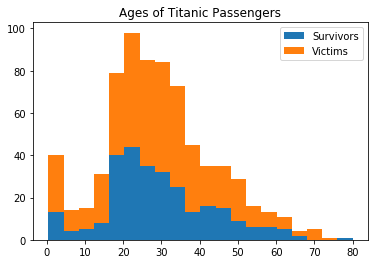

In [123]:
ages = dfTitanic["Age"]
print("Mean = {:.6f}\tMedian = {}".format(np.mean(ages),np.median(ages)))
surv = dfTitanic["Survived"]==1

fig,ax = plt.subplots(1,1)

ax.hist([ages[surv], ages[~surv]],20,histtype="barstacked",)
ax.legend(["Survivors","Victims"])
ax.set_title("Ages of Titanic Passengers")

The above measures can be used to characterize the data. The fact that the mean is a higher values than the medain means that the age data is slightly positively skewed. The histogram visualizes the distribution and shows us that the primary mode is 98 people in the age range of approximately 20--24. A secondary, smaller mode is seen in the first bin, with 40 passengers being children ages 0--4

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [124]:
fs = (dfTitanic["Sex"]=="female") & (dfTitanic["Survived"]==1)
fd = (dfTitanic["Sex"]=="female") & (dfTitanic["Survived"]==0)

print("For surviving females:\nMean Age = {:.2f}\tMedian Age = {}".format(ages[fs].mean(),ages[fs].median()))
print("For non-surviving females:\nMean Age = {:.2f}\tMedian Age = {}".format(ages[fd].mean(),ages[fd].median()))


For surviving females:
Mean Age = 28.41	Median Age = 26.0
For non-surviving females:
Mean Age = 28.92	Median Age = 29.0


**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

The data do suggest that class warfare and male chivalry both played a role in the final hours aboard the Titanic. The class warfare hypothesis is supported by the fact that the survival rate was higher among the higher classes, as shown in part C. The male chivalry hypothesis was also supported by the fact that female survival rates were much higher than those among males, as shown in part D. In part E it was determined that the ages of the passengers were skewed slightly towards the elderly, despite there being a relatively high number of young children. In part F it was determined that the populations of females don't differ much in age, based on whether or not they survived.

### Problem 5 - No arm in another tentacle problem, eh?
***

_Octopuses have eight arms, which are often called tentacles._ 

While technically a fact about the noble octopus, this doesn't really do much for the imagination. Go find another octopus fact that you think is cool *and* that you think no one else is likely to report! In fact, *if your fact is unique, you'll earn extra credit on this problem*! Submit your fact [here](https://docs.google.com/forms/d/e/1FAIpQLScjminsyl9Q1d_OswAXHNLKPj9Gu-00qhVsy07VYDZC8d36LQ/viewform?usp=sf_link).

### Problem 6 - Dirty Data
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [125]:
df = pd.read_csv("https://www.stat.berkeley.edu/~statlabs/data/babies.data", delim_whitespace=True)
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1



**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristics.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [126]:
df.info()
dfBabies = df[(df["gestation"]!=999) & (df["parity"]!=9) & (df["height"]!=99) & (df["weight"]!=999) & (df["smoke"]!=9)]
dfBabies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
bwt          1236 non-null int64
gestation    1236 non-null int64
parity       1236 non-null int64
age          1236 non-null int64
height       1236 non-null int64
weight       1236 non-null int64
smoke        1236 non-null int64
dtypes: int64(7)
memory usage: 67.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 1235
Data columns (total 7 columns):
bwt          1175 non-null int64
gestation    1175 non-null int64
parity       1175 non-null int64
age          1175 non-null int64
height       1175 non-null int64
weight       1175 non-null int64
smoke        1175 non-null int64
dtypes: int64(7)
memory usage: 73.4 KB


**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

(30, 180)

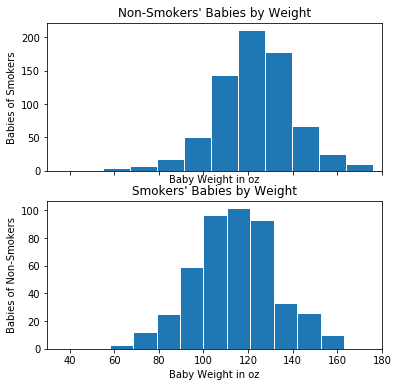

In [127]:
bwt_s = (dfBabies[dfBabies["smoke"]==1])["bwt"]
bwt_n = (dfBabies[dfBabies["smoke"]==0])["bwt"]


fig,axs = plt.subplots(2,1,sharex=True, figsize=(6,6))

axs[0].hist(bwt_n,edgecolor="white")
axs[0].set_xlabel("Baby Weight in oz")
axs[0].set_ylabel("Babies of Smokers")
axs[0].set_title("Non-Smokers' Babies by Weight")
axs[0].set_xlim(30,180)

axs[1].hist(bwt_s,edgecolor="white")
axs[1].set_xlabel("Baby Weight in oz")
axs[1].set_ylabel("Babies of Non-Smokers")
axs[1].set_title("Smokers' Babies by Weight")
axs[1].set_xlim(30,180)

**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

Based on the above histogram, it can be determined that baby birth weights are generally higher among the babies of non-smoker mothers. Both distributions are unimodal and fairly symmetrical

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [128]:
def mean_and_med(df,description):
    mean_val = df.mean()
    median_val = df.median()
    print("The mean value of {} is {:.2f}\tThe median is {}".format(description,mean_val,median_val))
    
mean_and_med(bwt_n,"Weight of Babies of Non-Smokers")
mean_and_med(bwt_s,"Weight of Babies of Smokers    ")

The mean value of Weight of Babies of Non-Smokers is 123.09	The median is 123.0
The mean value of Weight of Babies of Smokers     is 113.82	The median is 115.0


As seen in the above calculation, the mean and median weights for the clean babies are higher than those of the babies with smoking mothers. It is valid to use the mean as a measure of center to compare birth weights in this problem because the distributions have no outliers, as seen in the histograms above. It is also a good sign that values for mean and median are very close in both cases

**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

[Text(0,0,'Non-Smoker Mothers'), Text(0,0,'Smoker Mothers')]

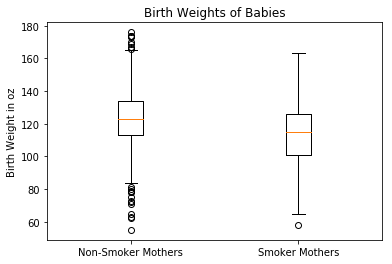

In [136]:
fig,ax = plt.subplots(1,1)

ax.boxplot([bwt_n,bwt_s])
ax.set_title("Birth Weights of Babies")
ax.set_ylabel("Birth Weight in oz")
ax.set_xticklabels(["Non-Smoker Mothers","Smoker Mothers"])

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

We can tell that the IQR for the dataset from non-smoking mothers is less because the height of the box is smaller, suggesting a higher amount of data is within the box and therefore, very close to the median. This suggests the set has less variance. This dataset also shows a higher number of points outside the "whiskers" of the plot. Between the two distributions, it can again be seen that the median value of weight for babies of smoking mothers is lower, but also that the $Q_1$ and $Q_3$ values are also lower.

In [134]:
print(np.std(bwt_n),np.std(bwt_s))

17.41150635563454 18.255477853088724


### Challenge Problem
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors.  

In the 1954 book _How to Lie with Statistics_ authors Darrell Huff and Irving Geis describe many common ways that people concoct misleading graphics.  An excerpt from these chapters can be found [here](https://piazza.com/class_profile/get_resource/j6pfvv6b9ze4gi/j771gy7fdpe3e7).  

Your job is to go out onto the web and find some data that you find interesting.  Then create both a misleading and a non-misleading version of a graphical summary for the data. 